In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import torch

import constant
from constant import org_cols, wsr_cols, geo_cols, semigeo_cols
import myplot
from models import model_evaluation, model_improvement
path = "PH_SC_1/"
model_path = constant.model_path + path
plot_path = constant.plot_path + path
error_path = constant.error_path + path


In [2]:
%load_ext autoreload

# Evaluation

## load evaluation data, models, features

In [3]:
df_evl = pd.read_parquet(constant.PH_SC_EVL_path)
df_evl["TIME_CET"] = pd.to_datetime(df_evl["TIME_CET"])

In [4]:
model_original = torch.load(model_path + "original_model.pth")
model_wsr = torch.load(model_path + "wsr_model.pth")
model_geo = torch.load(model_path + "geo_model.pth")
model_semigeo = torch.load(model_path + "semigeo_model.pth")

## 1d, 24hours

In [6]:
date_s = pd.to_datetime("2019-03-01")
date_e = pd.to_datetime("2019-03-02")
df_evl_1d = df_evl[df_evl["TIME_CET"] >= date_s][df_evl["TIME_CET"] < date_e].sort_values(["TIME_CET"]).reset_index(drop=True)

### 4 Models evaluation

In [7]:
original_err = model_evaluation(df_evl_1d, org_cols, model_original, path=error_path+"original_error_1d.csv")
wsr_err = model_evaluation(df_evl_1d, wsr_cols, model_wsr, path=error_path+"wsr_error_1d.csv")
geo_err = model_evaluation(df_evl_1d, geo_cols, model_geo, path=error_path+"geo_error_1d.csv")
semigeo_err = model_evaluation(df_evl_1d, semigeo_cols, model_semigeo, path=error_path+"semigeo_error_1d.csv")

#### Model Comparement

In [8]:
imp, r2 = model_improvement({"Original": original_err, "Windshear": wsr_err, "Geo": geo_err, "Semigeo": semigeo_err})
r2

{'Original': -0.143, 'Windshear': -16.049, 'Geo': 0.731, 'Semigeo': -13.862}

### Plot Normalized Error

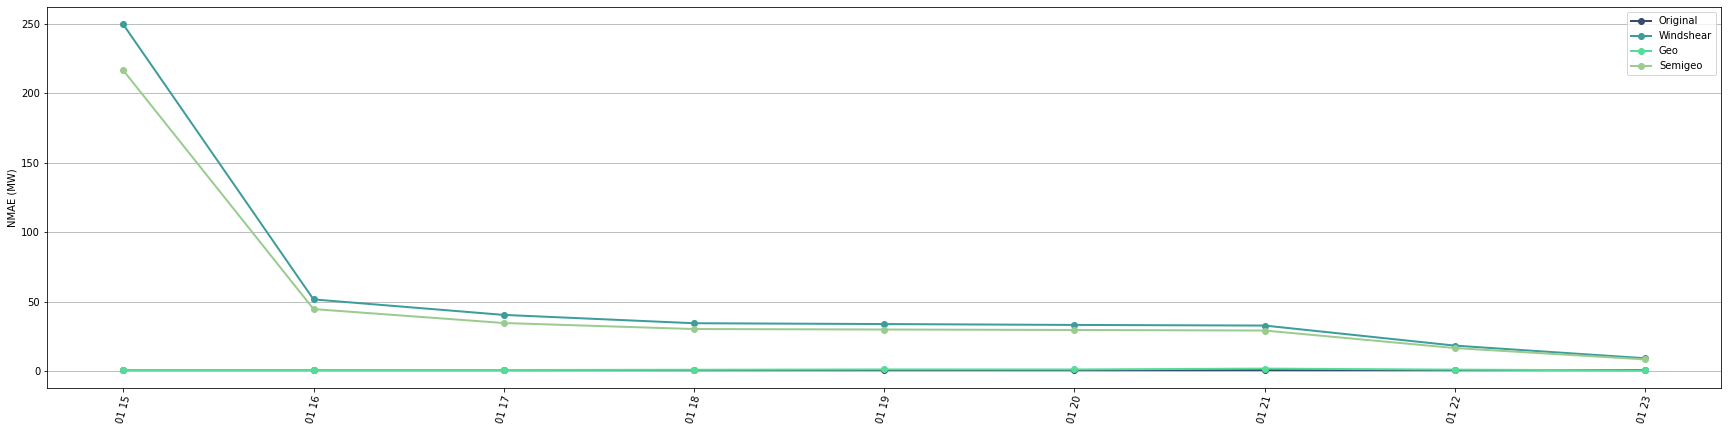

In [9]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMAE"], "Windshear" : wsr_err["NMAE"], "Geo" : geo_err["NMAE"], "Semigeo" : semigeo_err["NMAE"]}, ylabel="NMAE (MW)", path=plot_path+"Model_compare_NMAE_1d.png")

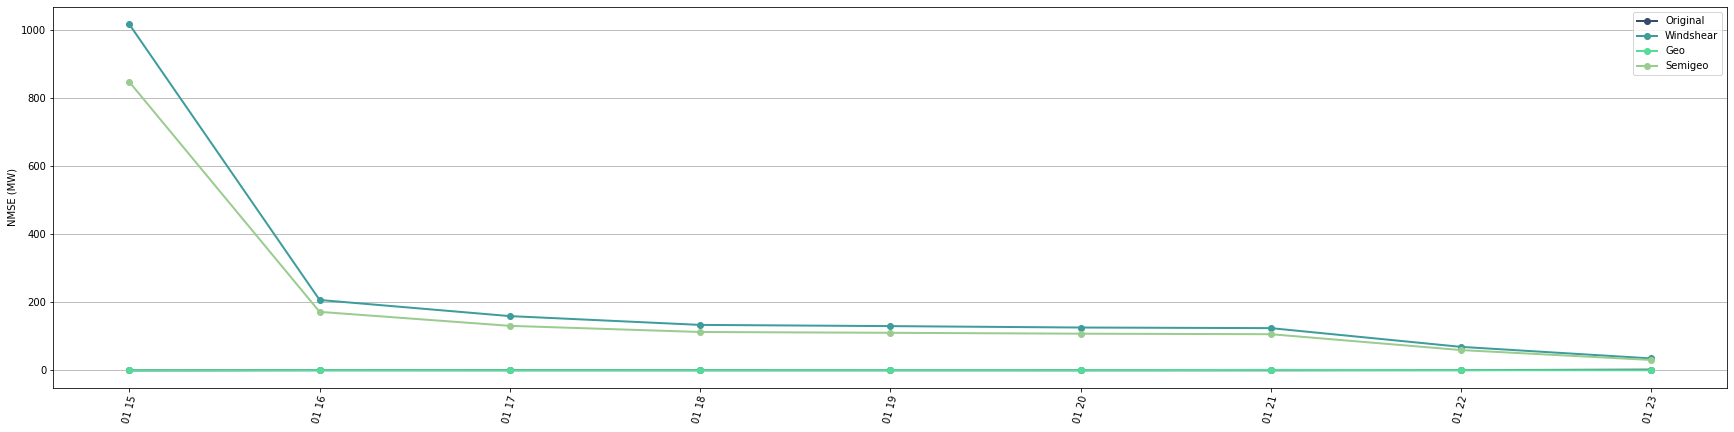

In [10]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMSE"], "Windshear" : wsr_err["NMSE"], "Geo" : geo_err["NMSE"], "Semigeo" : semigeo_err["NMSE"]}, ylabel="NMSE (MW)", path=plot_path+"Model_compare_NMSE_1d.png")

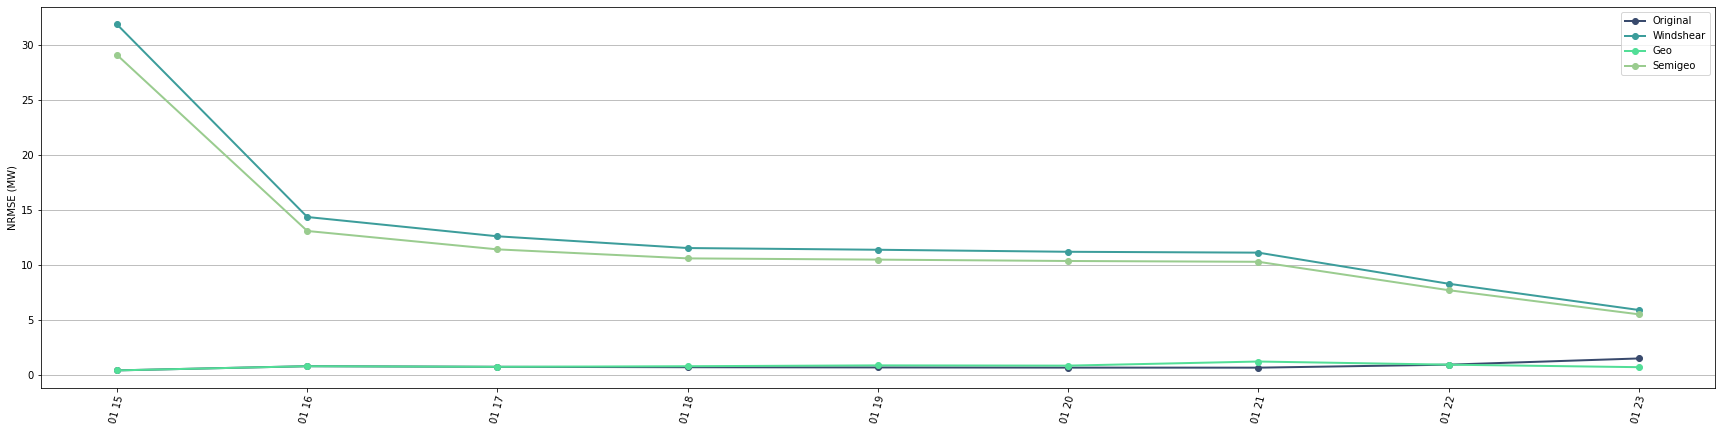

In [11]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NRMSE"], "Windshear" : wsr_err["NRMSE"], "Geo" : geo_err["NRMSE"], "Semigeo" : semigeo_err["NRMSE"]}, ylabel="NRMSE (MW)", path=plot_path+"Model_compare_NRMSE_1d.png")

### Plot Cumulated Normalized Error

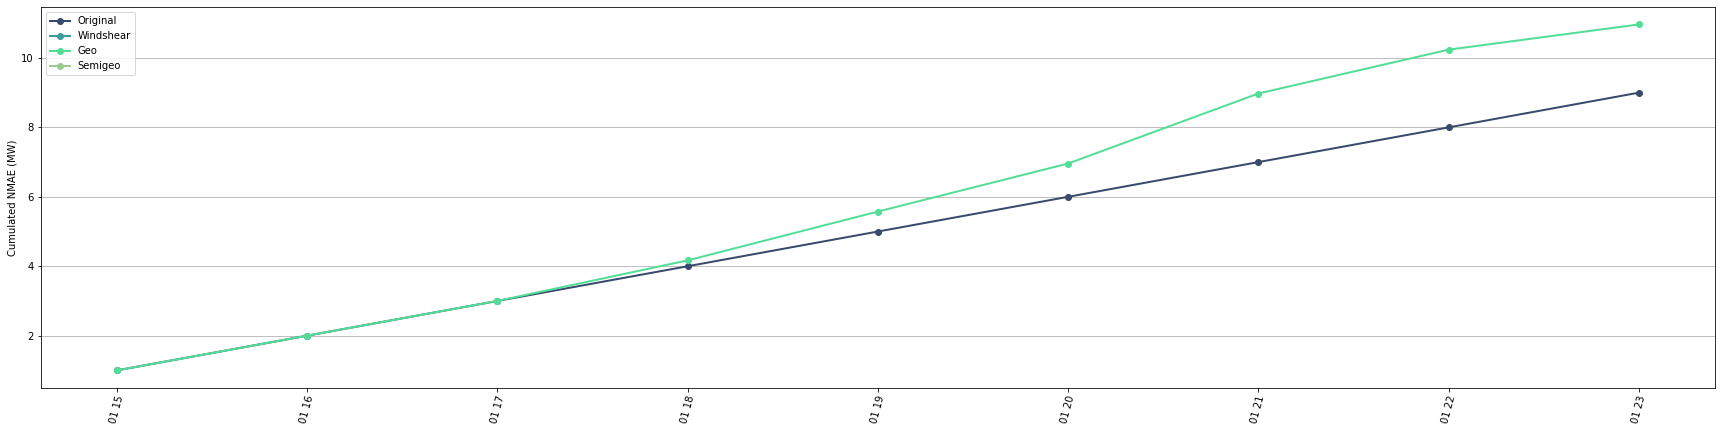

In [12]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMAE_CUM"], "Windshear" : wsr_err["NMAE_CUM"], "Geo" : geo_err["NMAE_CUM"], "Semigeo" : semigeo_err["NMAE_CUM"]}, ylabel="Cumulated NMAE (MW)", path=plot_path+"Model_compare_CNMAE_1d.png")

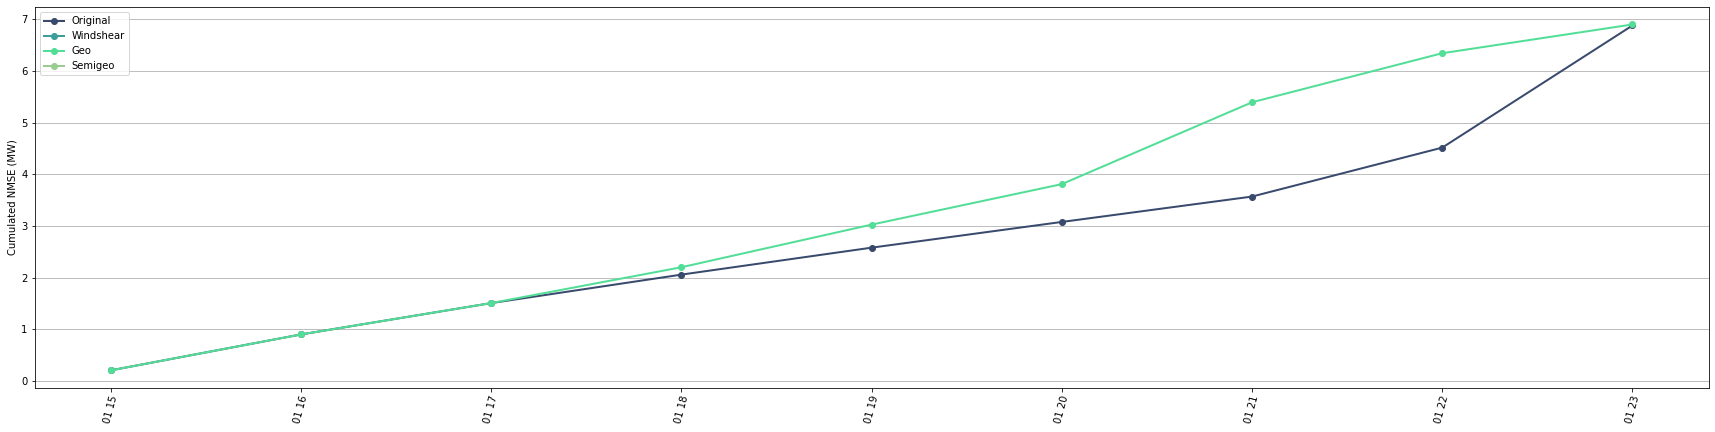

In [13]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMSE_CUM"], "Windshear" : wsr_err["NMSE_CUM"], "Geo" : geo_err["NMSE_CUM"], "Semigeo" : semigeo_err["NMSE_CUM"]}, ylabel="Cumulated NMSE (MW)", path=plot_path+"Model_compare_CNMSE_1d.png")

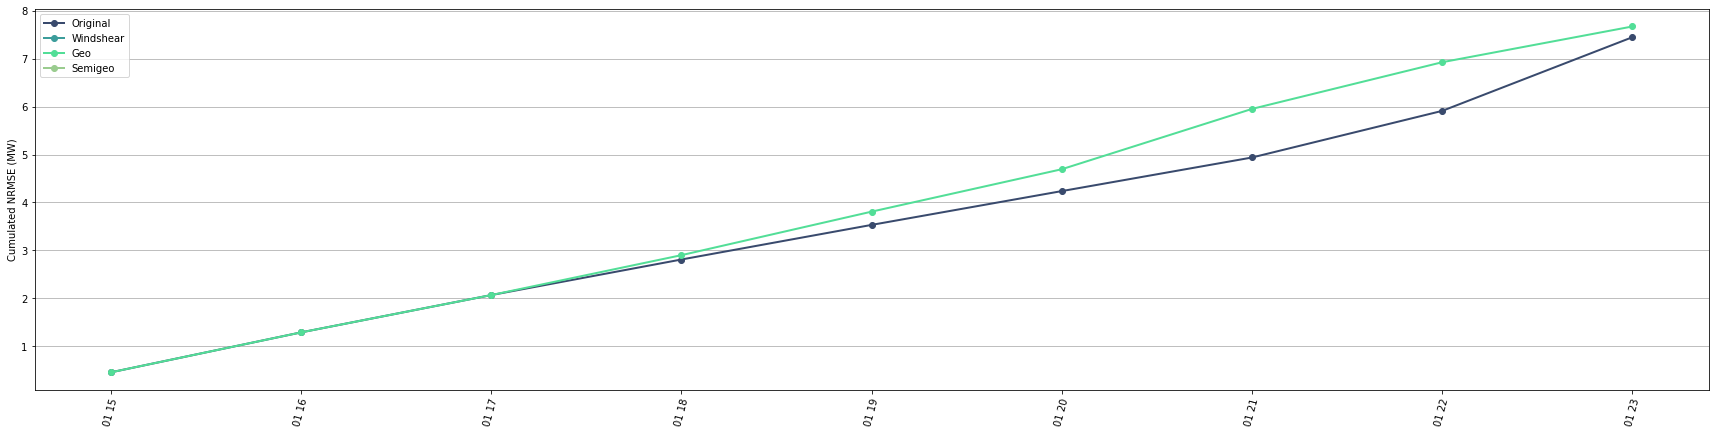

In [14]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NRMSE_CUM"], "Windshear" : wsr_err["NRMSE_CUM"], "Geo" : geo_err["NRMSE_CUM"], "Semigeo" : semigeo_err["NRMSE_CUM"]}, ylabel="Cumulated NRMSE (MW)", path=plot_path+"Model_compare_CNRMSE_1d.png")

### Plot Prediction

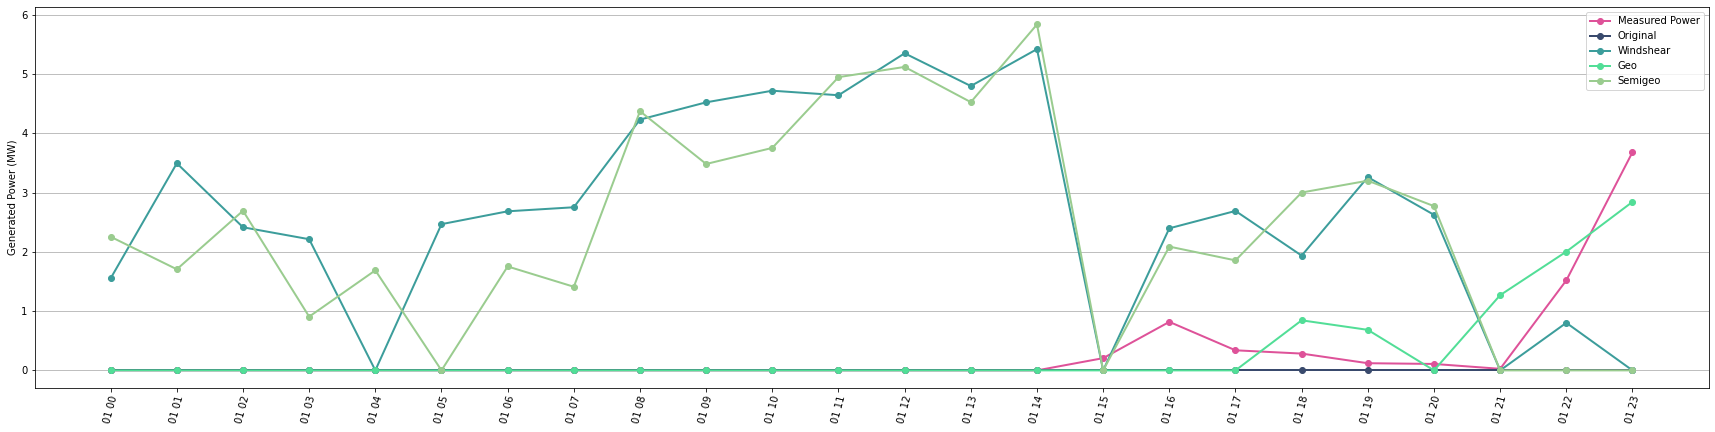

In [15]:
myplot.timelines(original_err["TIME_CET"], {"Measured Power" : original_err["VAERDI"], "Original" : original_err["pred"], "Windshear" : wsr_err["pred"], "Geo" : geo_err["pred"], "Semigeo" : semigeo_err["pred"]}, ylabel="Generated Power (MW)", path=plot_path+"Model_predict_1d.png")

## 2ds, 48hours

In [16]:
date_s = pd.to_datetime("2019-03-01")
date_e = pd.to_datetime("2019-03-03")
df_evl_2d = df_evl[df_evl["TIME_CET"] >= date_s][df_evl["TIME_CET"] < date_e].sort_values(["TIME_CET"]).reset_index(drop=True)

### 4 Models evaluation

In [17]:
original_err = model_evaluation(df_evl_2d, org_cols, model_original, path=error_path+"original_error_2d.csv")
wsr_err = model_evaluation(df_evl_2d, wsr_cols, model_wsr, path=error_path+"wsr_error_2d.csv")
geo_err = model_evaluation(df_evl_2d, geo_cols, model_geo, path=error_path+"geo_error_2d.csv")
semigeo_err = model_evaluation(df_evl_2d, semigeo_cols, model_semigeo, path=error_path+"semigeo_error_2d.csv")

#### Model Comparement

In [18]:
imp, r2 = model_improvement({"Original": original_err, "Windshear": wsr_err, "Geo": geo_err, "Semigeo": semigeo_err})
r2

{'Original': -0.357, 'Windshear': -0.783, 'Geo': 0.279, 'Semigeo': -0.715}

### Plot Normalized Error

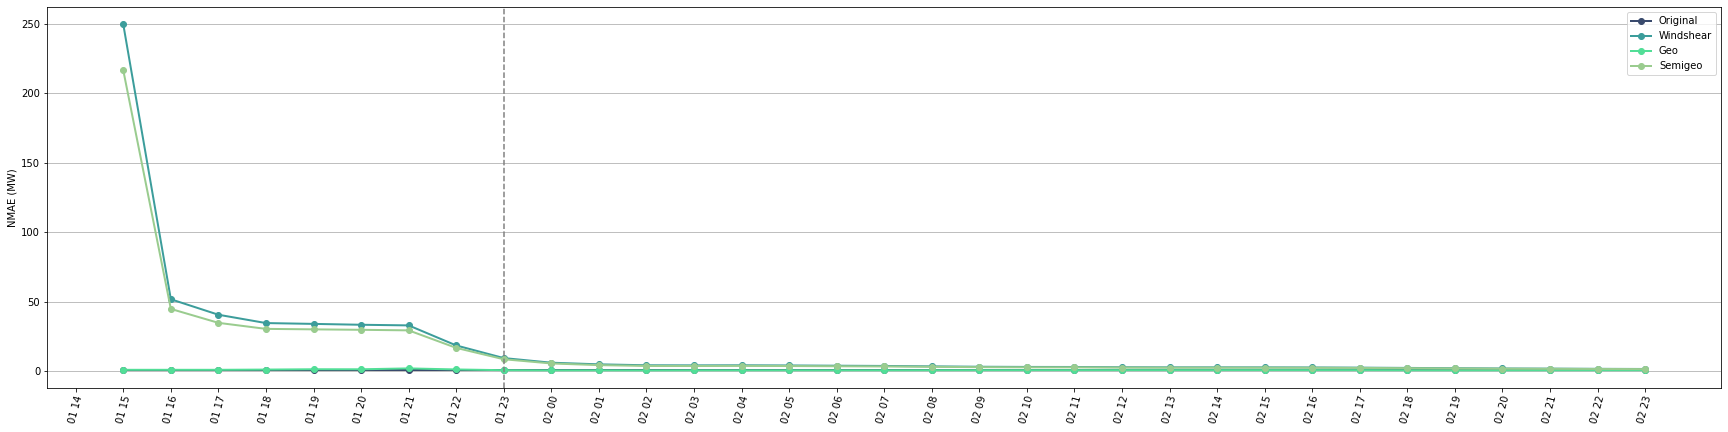

In [19]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMAE"], "Windshear" : wsr_err["NMAE"], "Geo" : geo_err["NMAE"], "Semigeo" : semigeo_err["NMAE"]}, ylabel="NMAE (MW)", path=plot_path+"Model_compare_NMAE_2d.png")

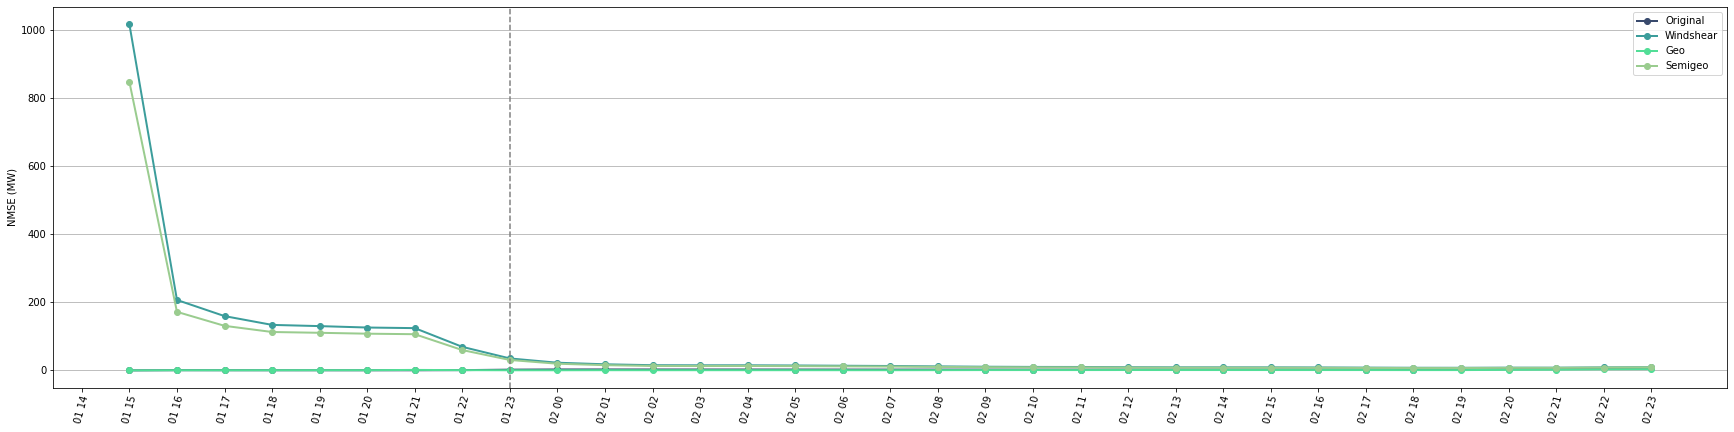

In [20]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMSE"], "Windshear" : wsr_err["NMSE"], "Geo" : geo_err["NMSE"], "Semigeo" : semigeo_err["NMSE"]}, ylabel="NMSE (MW)", path=plot_path+"Model_compare_NMSE_2d.png")

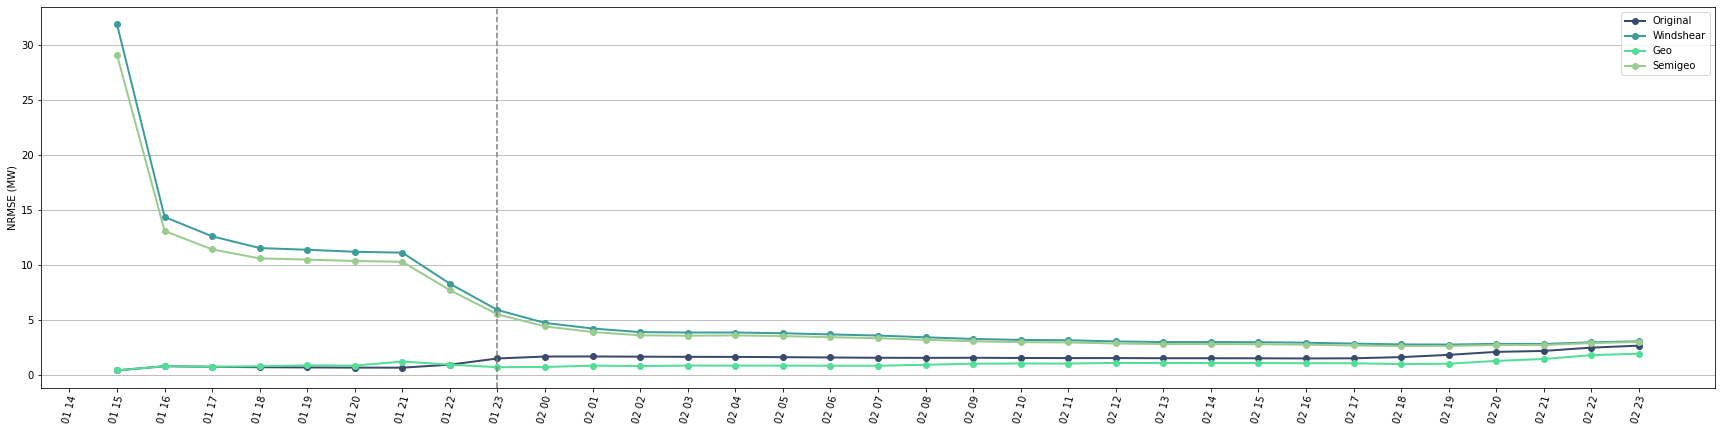

In [21]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NRMSE"], "Windshear" : wsr_err["NRMSE"], "Geo" : geo_err["NRMSE"], "Semigeo" : semigeo_err["NRMSE"]}, ylabel="NRMSE (MW)", path=plot_path+"Model_compare_RNMSE_2d.png")

### Plot Cumulated Normalized Error

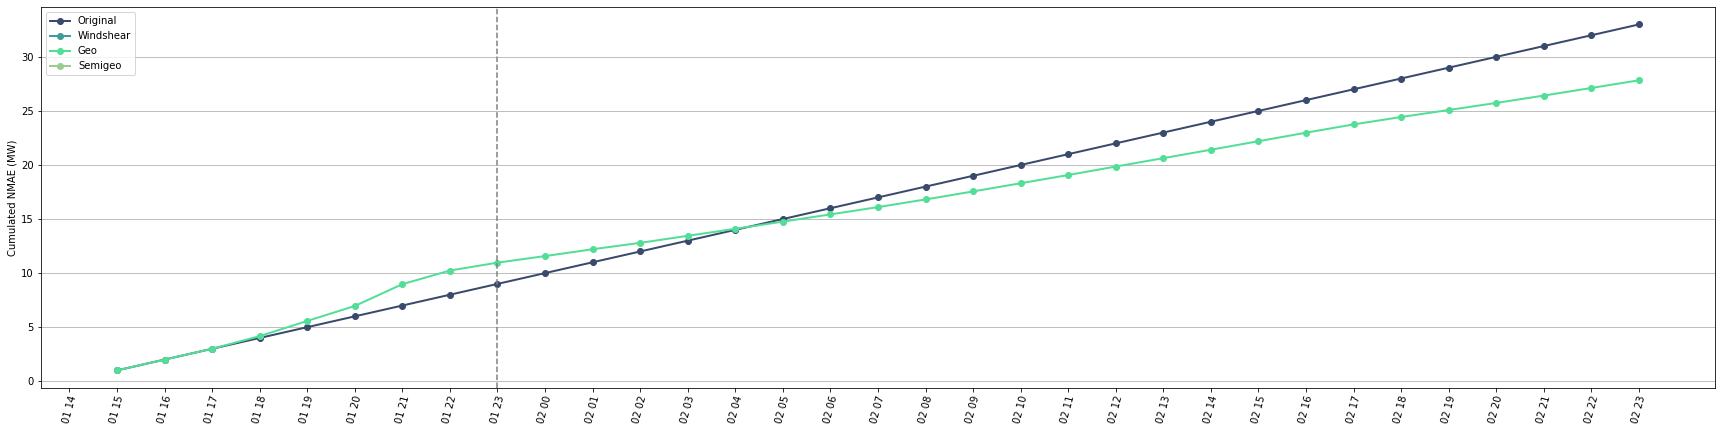

In [22]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMAE_CUM"], "Windshear" : wsr_err["NMAE_CUM"], "Geo" : geo_err["NMAE_CUM"], "Semigeo" : semigeo_err["NMAE_CUM"]}, ylabel="Cumulated NMAE (MW)", path=plot_path+"Model_compare_CNMAE_2d.png")

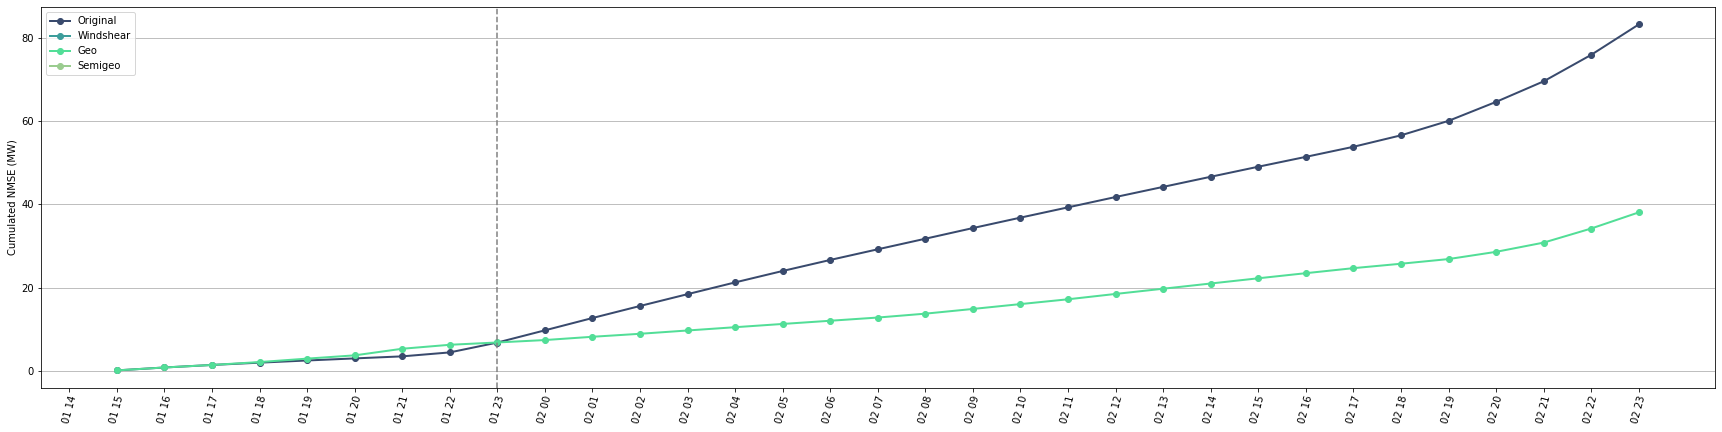

In [23]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMSE_CUM"], "Windshear" : wsr_err["NMSE_CUM"], "Geo" : geo_err["NMSE_CUM"], "Semigeo" : semigeo_err["NMSE_CUM"]}, ylabel="Cumulated NMSE (MW)", path=plot_path+"Model_compare_CNMSE_2d.png")

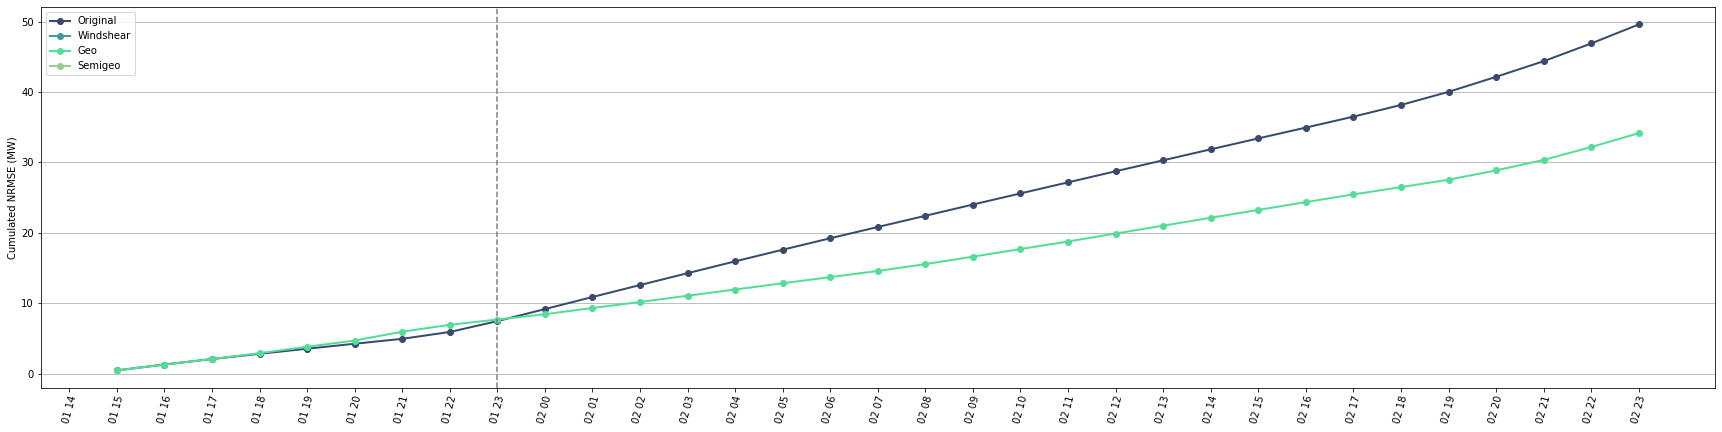

In [24]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NRMSE_CUM"], "Windshear" : wsr_err["NRMSE_CUM"], "Geo" : geo_err["NRMSE_CUM"], "Semigeo" : semigeo_err["NRMSE_CUM"]}, ylabel="Cumulated NRMSE (MW)", path=plot_path+"Model_compare_CNRMSE_2d.png")

### Plot Prediction

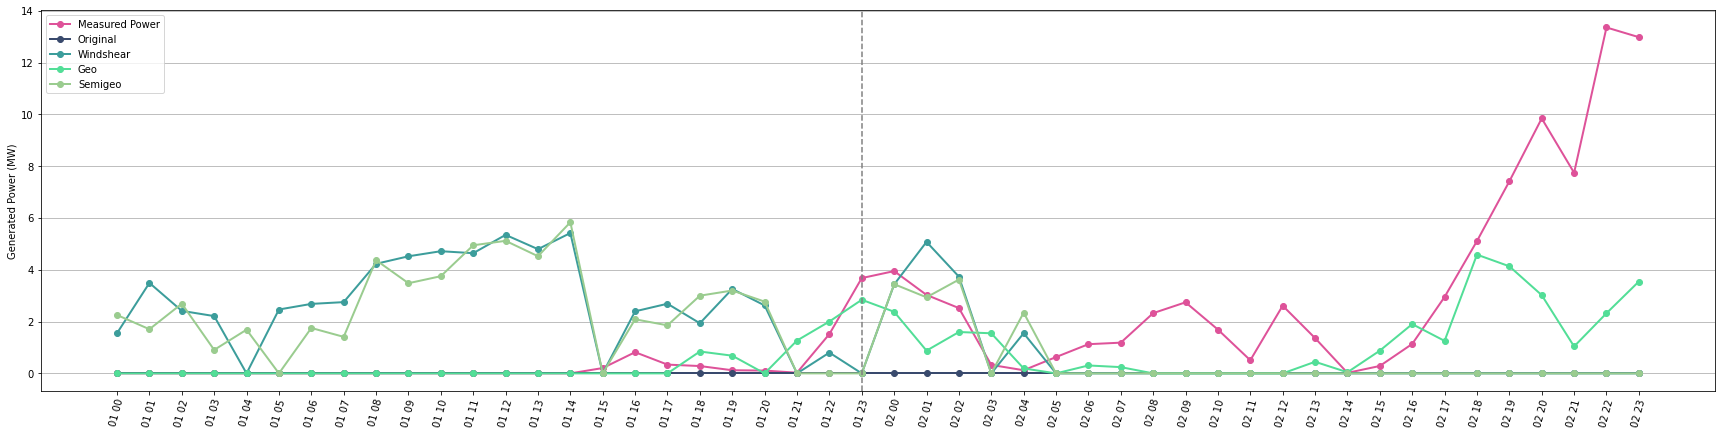

In [25]:
myplot.timelines(original_err["TIME_CET"], {"Measured Power" : original_err["VAERDI"], "Original" : original_err["pred"], "Windshear" : wsr_err["pred"], "Geo" : geo_err["pred"], "Semigeo" : semigeo_err["pred"]}, ylabel="Generated Power (MW)", path=plot_path+"Model_predict_2d.png")

## 5ds, 120hours

In [26]:
date_s = pd.to_datetime("2019-03-01")
date_e = pd.to_datetime("2019-03-06")
df_evl_5d = df_evl[df_evl["TIME_CET"] >= date_s][df_evl["TIME_CET"] < date_e].sort_values(["TIME_CET"]).reset_index(drop=True)

### 4 Models evaluation

In [27]:
original_err = model_evaluation(df_evl_5d, org_cols, model_original, path=error_path+"original_error_5d.csv")
wsr_err = model_evaluation(df_evl_5d, wsr_cols, model_wsr, path=error_path+"wsr_error_5d.csv")
geo_err = model_evaluation(df_evl_5d, geo_cols, model_geo, path=error_path+"geo_error_5d.csv")
semigeo_err = model_evaluation(df_evl_5d, semigeo_cols, model_semigeo, path=error_path+"semigeo_error_5d.csv")

#### Model Comparement

In [28]:
imp, r2 = model_improvement({"Original": original_err, "Windshear": wsr_err, "Geo": geo_err, "Semigeo": semigeo_err})
r2

{'Original': -0.821, 'Windshear': 0.078, 'Geo': 0.792, 'Semigeo': 0.025}

### Plot Normalized Error

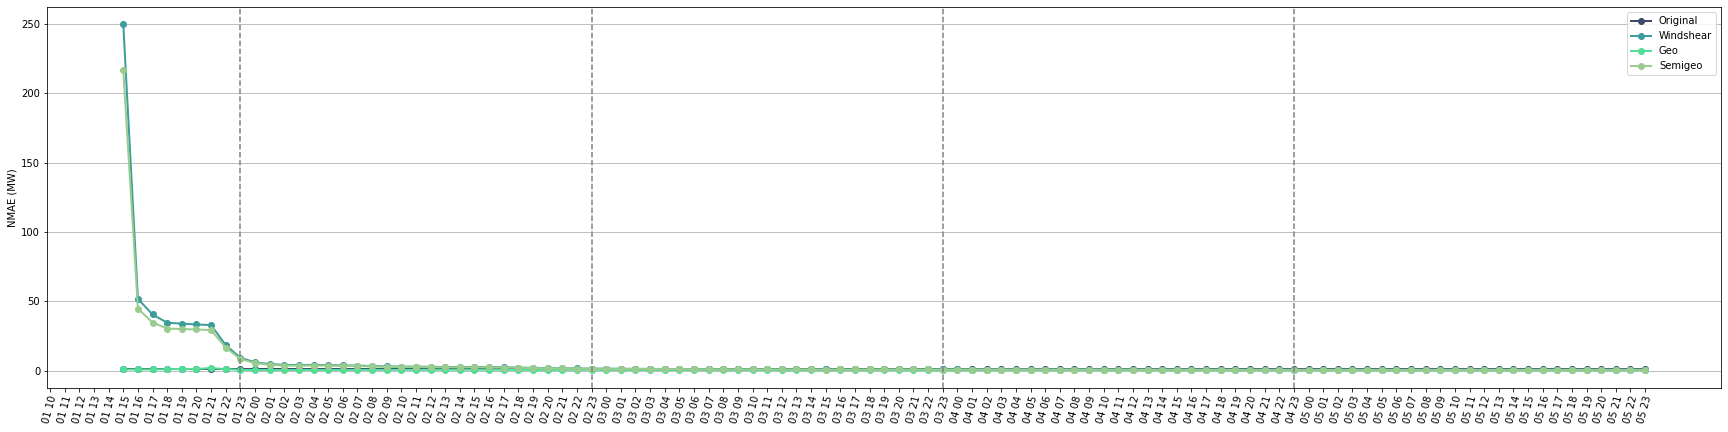

In [29]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMAE"], "Windshear" : wsr_err["NMAE"], "Geo" : geo_err["NMAE"], "Semigeo" : semigeo_err["NMAE"]}, ylabel="NMAE (MW)", path=plot_path+"Model_compare_NMAE_5d.png")

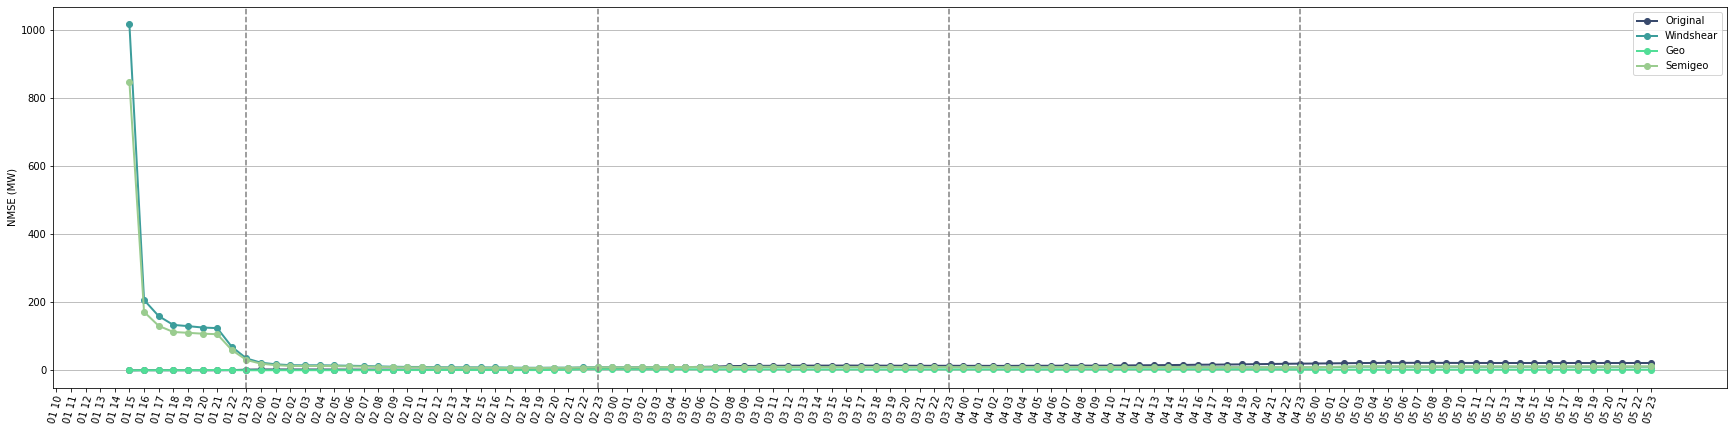

In [30]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMSE"], "Windshear" : wsr_err["NMSE"], "Geo" : geo_err["NMSE"], "Semigeo" : semigeo_err["NMSE"]}, ylabel="NMSE (MW)", path=plot_path+"Model_compare_NMSE_5d.png")

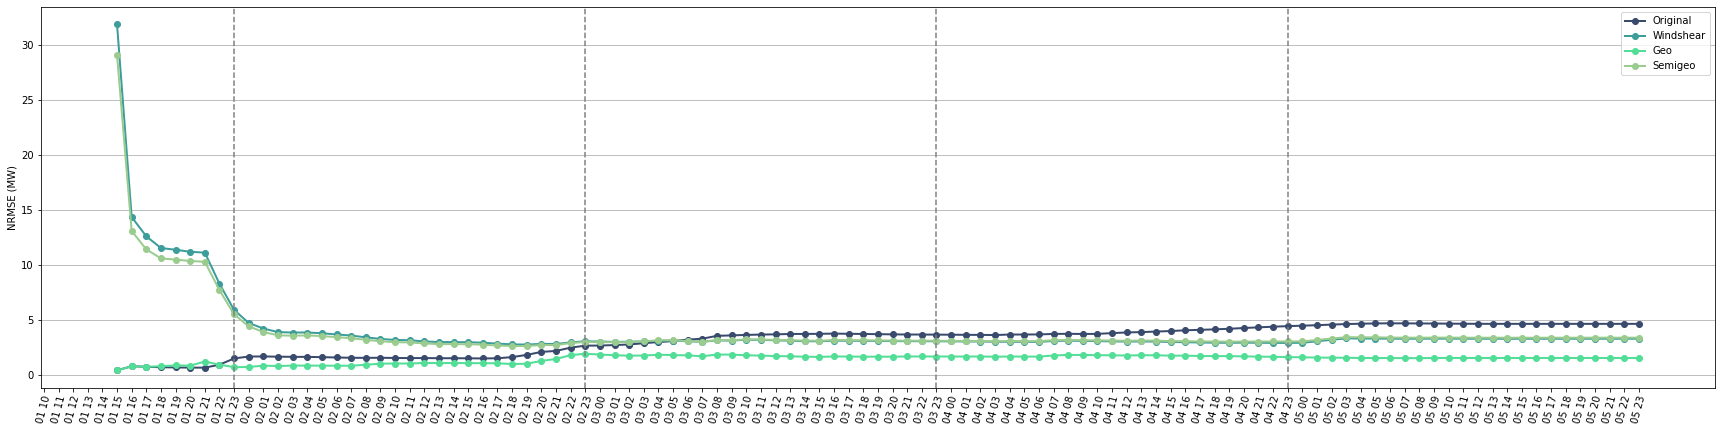

In [31]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NRMSE"], "Windshear" : wsr_err["NRMSE"], "Geo" : geo_err["NRMSE"], "Semigeo" : semigeo_err["NRMSE"]}, ylabel="NRMSE (MW)", path=plot_path+"Model_compare_RNMSE_5d.png")

### Plot Cumulated Normalized Error

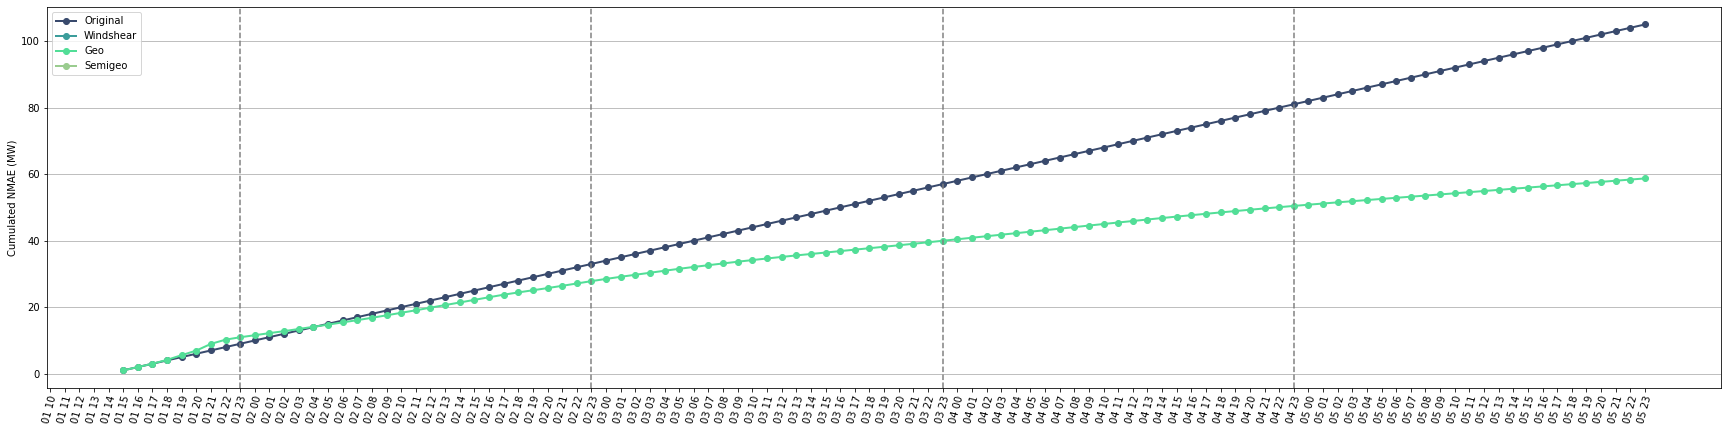

In [32]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMAE_CUM"], "Windshear" : wsr_err["NMAE_CUM"], "Geo" : geo_err["NMAE_CUM"], "Semigeo" : semigeo_err["NMAE_CUM"]}, ylabel="Cumulated NMAE (MW)", path=plot_path+"Model_compare_CNMAE_5d.png")

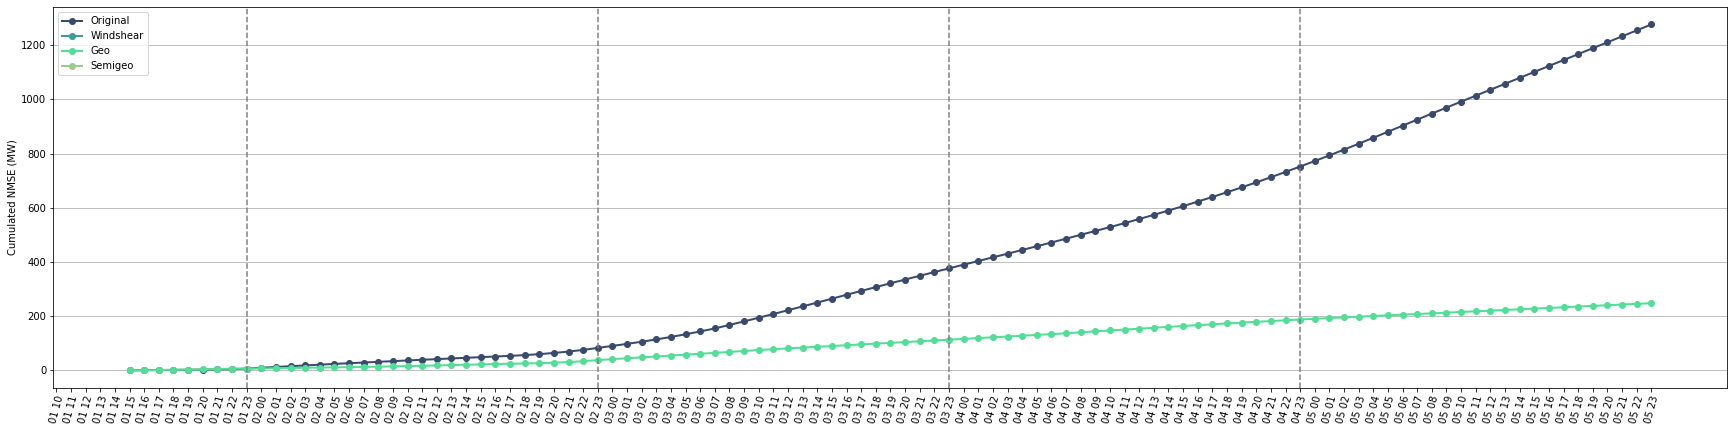

In [33]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMSE_CUM"], "Windshear" : wsr_err["NMSE_CUM"], "Geo" : geo_err["NMSE_CUM"], "Semigeo" : semigeo_err["NMSE_CUM"]}, ylabel="Cumulated NMSE (MW)", path=plot_path+"Model_compare_CNMSE_5d.png")

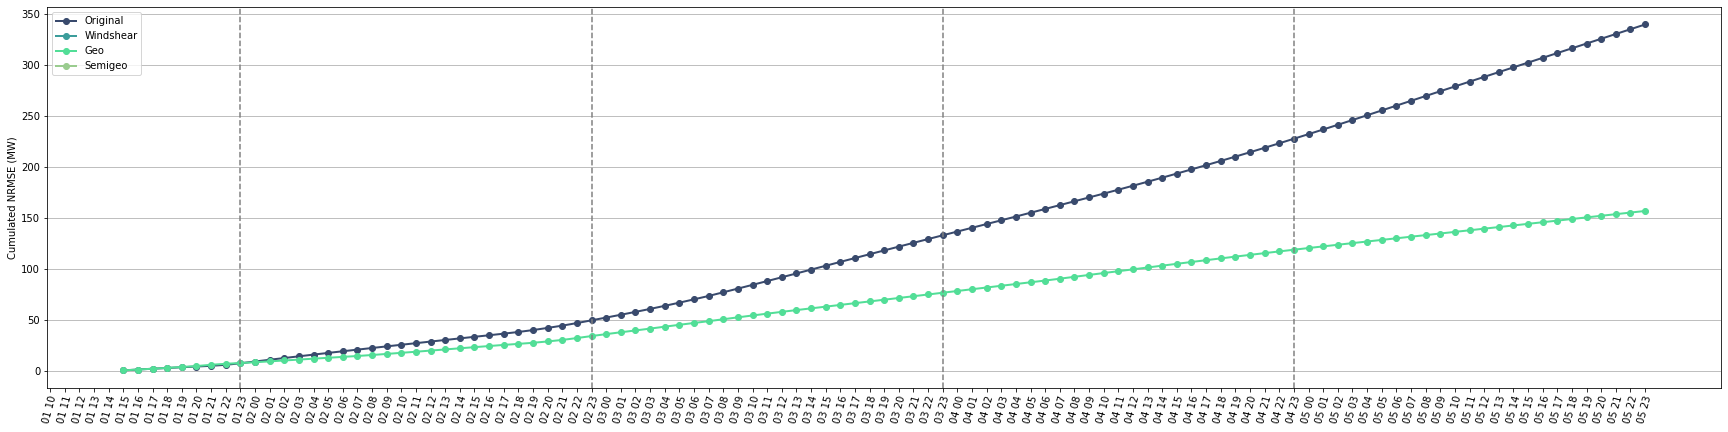

In [34]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NRMSE_CUM"], "Windshear" : wsr_err["NRMSE_CUM"], "Geo" : geo_err["NRMSE_CUM"], "Semigeo" : semigeo_err["NRMSE_CUM"]}, ylabel="Cumulated NRMSE (MW)", path=plot_path+"Model_compare_CNRMSE_5d.png")

### Plot Prediction

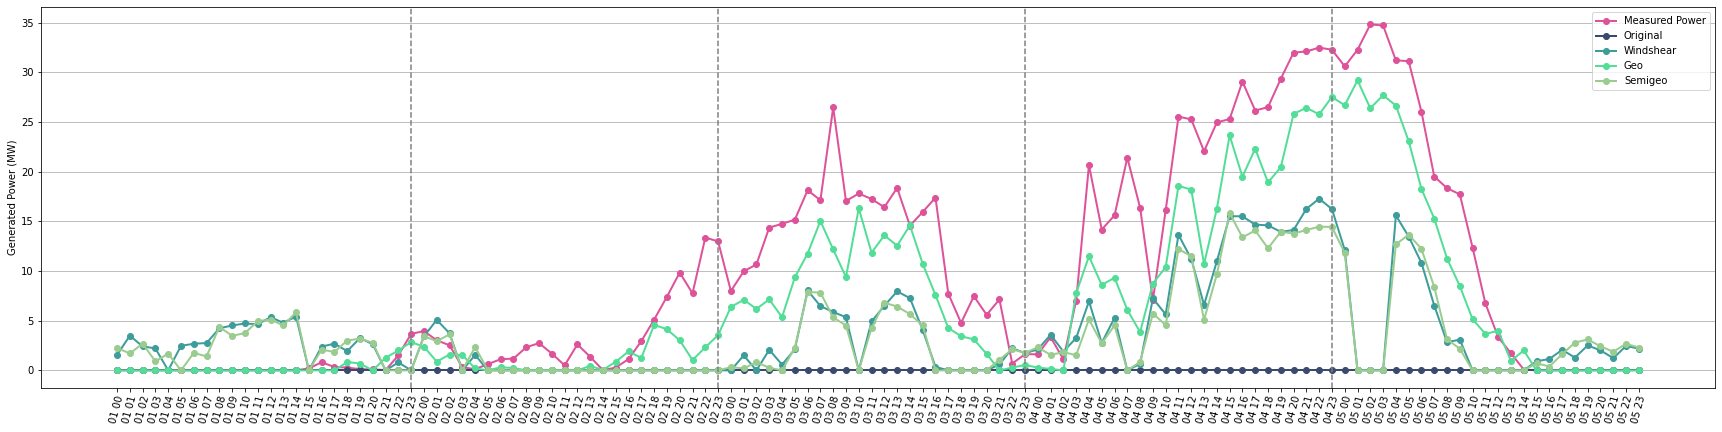

In [35]:
myplot.timelines(original_err["TIME_CET"], {"Measured Power" : original_err["VAERDI"], "Original" : original_err["pred"], "Windshear" : wsr_err["pred"], "Geo" : geo_err["pred"], "Semigeo" : semigeo_err["pred"]}, ylabel="Generated Power (MW)", path=plot_path+"Model_predict_5d.png")